In [1]:
import tensorflow as tf

import os

In [3]:

gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:

tf . print(tf. __version__)
len(gpus)

2.11.0


0

In [5]:
#Avoid OOM errors by setting GPU MEMORY consumption Growth
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

In [6]:
#1.2Remove dodgy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [13]:
data_dir = 'data'
image_exits = ['jpeg','jpg','bmp','png']

In [8]:
#os.listdir(os.path.join(data_dir,'Burger'))

In [9]:
# from pathlib import Path
# import imghdr

# data_dir = "C:/Users/bests/OneDrive/Desktop/fall2023/DS FORMERS/Project/final project - Copy/data/chicken"
# image_extensions = [".png", ".jpg"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.remove(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.remove(filepath)

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image) #data directory+image folder+iamge itself
        try:
            img = cv2.imread(image_path) #read the image as a numpy array
            tip = imghdr.what(image)
            if tip not in image_exits:
                #print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
           
            print('Issue with image {}',format(image_path))

In [15]:
import numpy as np

In [28]:

data = tf.keras.utils.image_dataset_from_directory('data') #building data pipelines  reestablsh the data pipeline

Found 6426 files belonging to 6 classes.


In [29]:
data_iterator = data.as_numpy_iterator() #make data iterable

In [49]:
batch = data_iterator.next()

In [47]:
batch #size of 32
print(len(batch)) #images & labels
print(batch[0].shape) #iamges in a batch   32images by 256x256pixels in three color channels
print(batch[1].shape) #labels in a batch


2
(32, 256, 256, 3)
(32,)


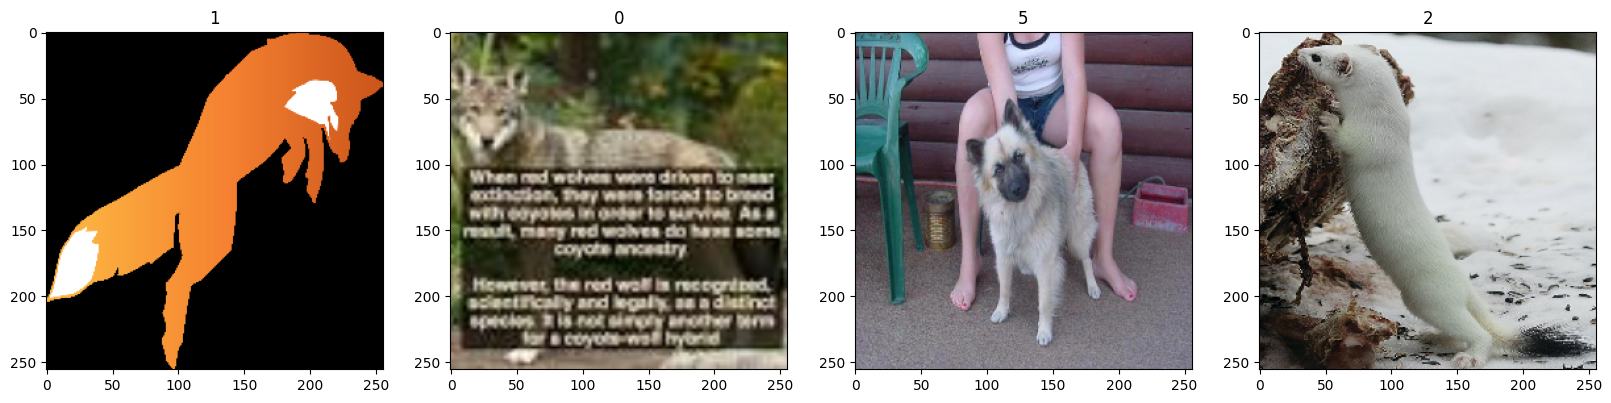

In [48]:
fig,ax = plt.subplots(ncols=4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#image pre-processing

In [51]:
#image pre-processing
data = data.map(lambda x,y:(x/255,y))  #x-images  #y-labels  get x and diveided by 255

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [52]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

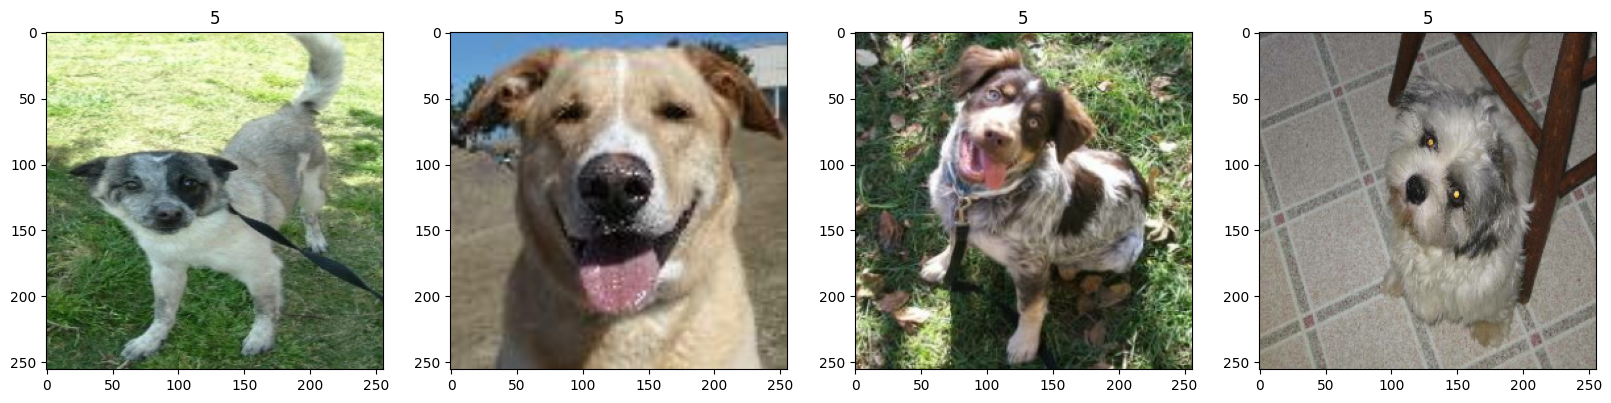

In [53]:
fig,ax = plt.subplots(ncols=4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [54]:
len(data)

201

In [122]:
#2.2 Split Data

train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1
print(train_size,val_size,test_size)
print(train_size+val_size+test_size)

140 40 21
201


In [56]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

3. Deep Model

In [57]:
#Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [70]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [71]:
#optimizer
#import tensorflow.keras as keras

model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [72]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [73]:
#Train

logdir = 'logs'

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
hist = model.fit(train, epochs=12, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/12
140/140 [==============================] - 64s 446ms/step - loss: 1.6456 - accuracy: 0.3569 - val_loss: 1.4713 - val_accuracy: 0.4469
Epoch 2/12
140/140 [==============================] - 62s 437ms/step - loss: 1.3592 - accuracy: 0.4893 - val_loss: 1.3510 - val_accuracy: 0.4898
Epoch 3/12
140/140 [==============================] - 62s 440ms/step - loss: 1.0987 - accuracy: 0.5960 - val_loss: 1.4486 - val_accuracy: 0.4906
Epoch 4/12
140/140 [==============================] - 62s 441ms/step - loss: 0.7029 - accuracy: 0.7516 - val_loss: 1.4954 - val_accuracy: 0.5609
Epoch 5/12
140/140 [==============================] - 64s 452ms/step - loss: 0.3723 - accuracy: 0.8781 - val_loss: 1.7773 - val_accuracy: 0.5547
Epoch 6/12
140/140 [==============================] - 62s 441ms/step - loss: 0.2129 - accuracy: 0.9440 - val_loss: 2.0550 - val_accuracy: 0.5523
Epoch 7/12
140/140 [==============================] - 62s 442ms/step - loss: 0.1482 - accuracy: 0.9598 - val_loss: 2.4260 - val_ac

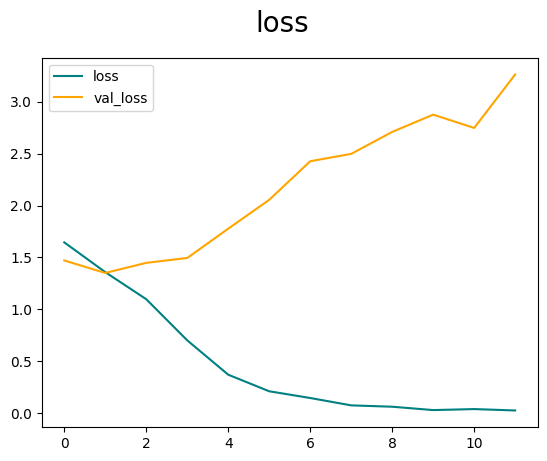

In [76]:
#3.3 Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

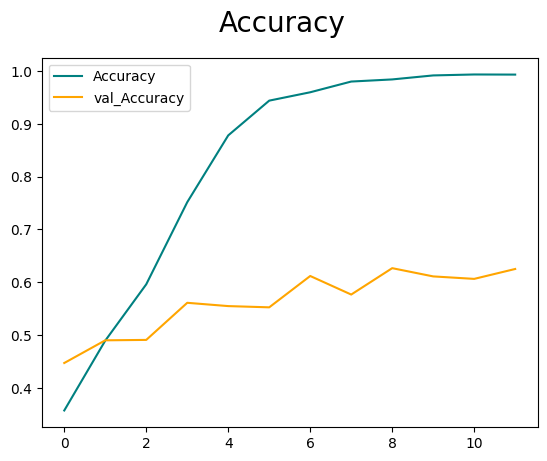

In [77]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_Accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [109]:
#Part4
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy
#4.1 evaluate
# pre = Precision()
# re = Recall()
acc=CategoricalAccuracy()



In [96]:
len(test)

21

In [123]:
import copy
correct = 0
total = 0
for batch in test.as_numpy_iterator():
    X,y = batch
    y = list(y)
    buffer = y
    
    y_total = []
    for i in range(len(y)):
        y_abc = []
        for q in range(y[i]):
            y_abc.append(0)
        y_abc.append(1)
        for q in range(5-y[i]):
            y_abc.append(0)
        y_total.append(y_abc)
    y_total = np.array(y_total)
    yhat = model.predict(X) 
    for i in range(len(y_total)):
        if (yhat[i][4]>=0.5 and y_total[i][4]==1) or (yhat[i][4]<0.5 and y_total[i][4]!=1):
            correct +=1
        total+=1


print(correct)
print(total)

print(f'The accuracy of the algorithm on predicting if the animal is chicken or not: {correct/total}')


    # pre.update_state(y_total,yhat)
    # re.update_state(y_total,yhat)
    #acc.update_state(y_total,yhat)

1/1 [==============================] - 0s 75ms/step
547
666
The accuracy of the algorithm on predicting if the animal is chicken or not: 0.8213213213213213


In [115]:
# print(pre.result(), re.result(), acc.result())
print(acc.result())

tf.Tensor(0.5375375, shape=(), dtype=float32)


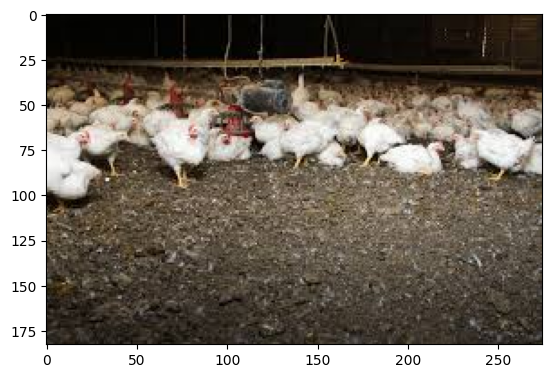

In [92]:
#4.2 Test
img = cv2.imread('C:/Users/bests/OneDrive/Desktop/fall2023/DS FORMERS/Project/final project - Copy/data/chicken/images121.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

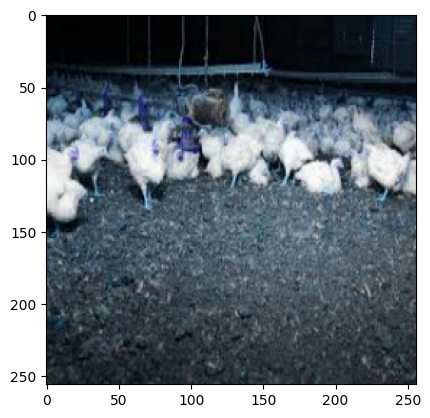

In [93]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [94]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
classes = ['Coyotes','Fox','Minks','Raccoon','Chicken','Dog']
print(classes[np.argmax(yhat)])

1/1 [==============================] - 0s 19ms/step
[[1.2643878e-06 4.8750888e-08 3.6975609e-07 1.4733443e-01 8.5243624e-01
  2.2760784e-04]]
Chicken


In [153]:
print(yhat)

[[6.0518485e-01 3.8098522e-05 3.8522474e-05 3.9473814e-01 3.2924072e-07
  1.7926831e-09]]


In [120]:
#5.Save the Model

from tensorflow.keras.models import load_model
model.save(os.path.join('models','animal_2.h5'))



In [121]:
new_model = load_model(os.path.join('models','animal_2.h5'))
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


array([[1.2643878e-06, 4.8750888e-08, 3.6975609e-07, 1.4733443e-01,
        8.5243624e-01, 2.2760784e-04]], dtype=float32)